# TASK 2 : Movie Rating Prediction 
### Author : Aditya Hirade

In [1]:
#Importing required libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Importing the dataset

df = pd.read_csv('IMDbMoviesIndia.csv' , encoding='ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(15509, 10)

In [4]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.shape

(15509, 10)

In [9]:
# check for nan values
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.dropna(subset=['Name','Year','Duration','Rating','Votes'],axis=0,inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [11]:
# For year change given format into number
df['Year'] = df['Year'].str.strip('()').astype(int)

In [12]:
# For votes change format into one singlenumber
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

# for Duration remove min and make as number
df['Duration'] = df['Duration'].str.replace('min','').astype(int)

In [13]:
df.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [14]:
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)
df['Rating'].fillna(df['Rating'].mode().max(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [15]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

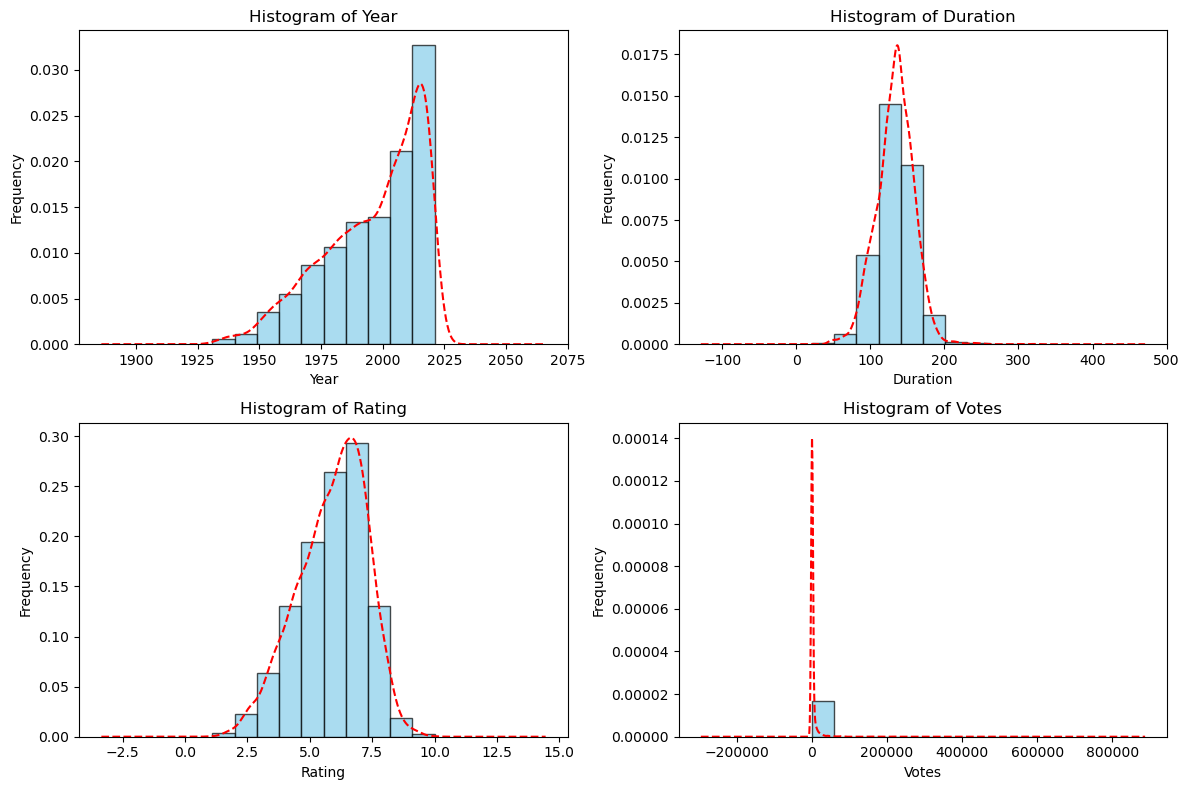

In [16]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black',density=True, alpha=0.7)
    df[column].plot.kde(color='red', linestyle='dashed')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

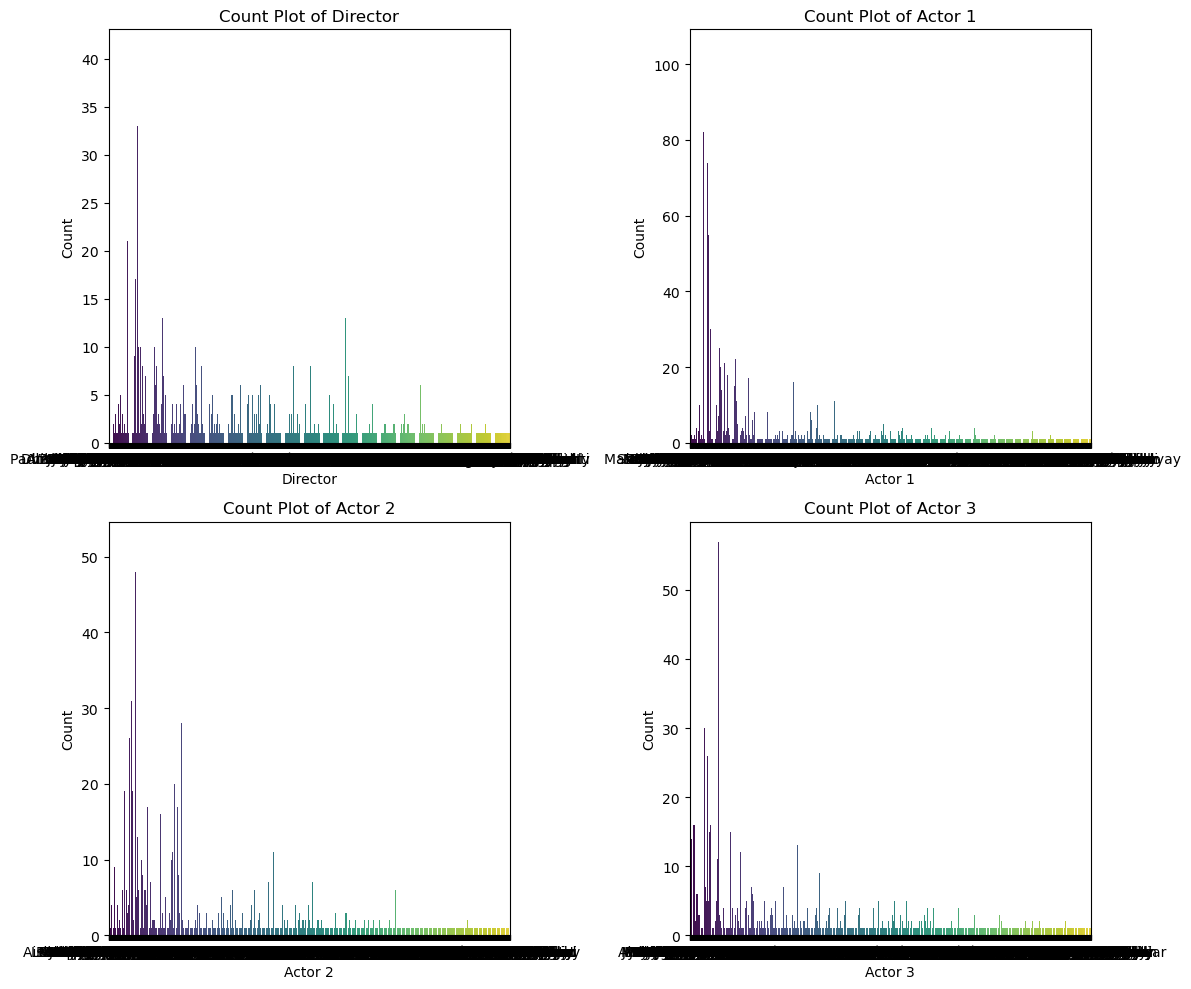

In [24]:
categorical_columns = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

plt.figure(figsize=(12, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()      ###Prevents overlapping
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Votes'}>]], dtype=object)

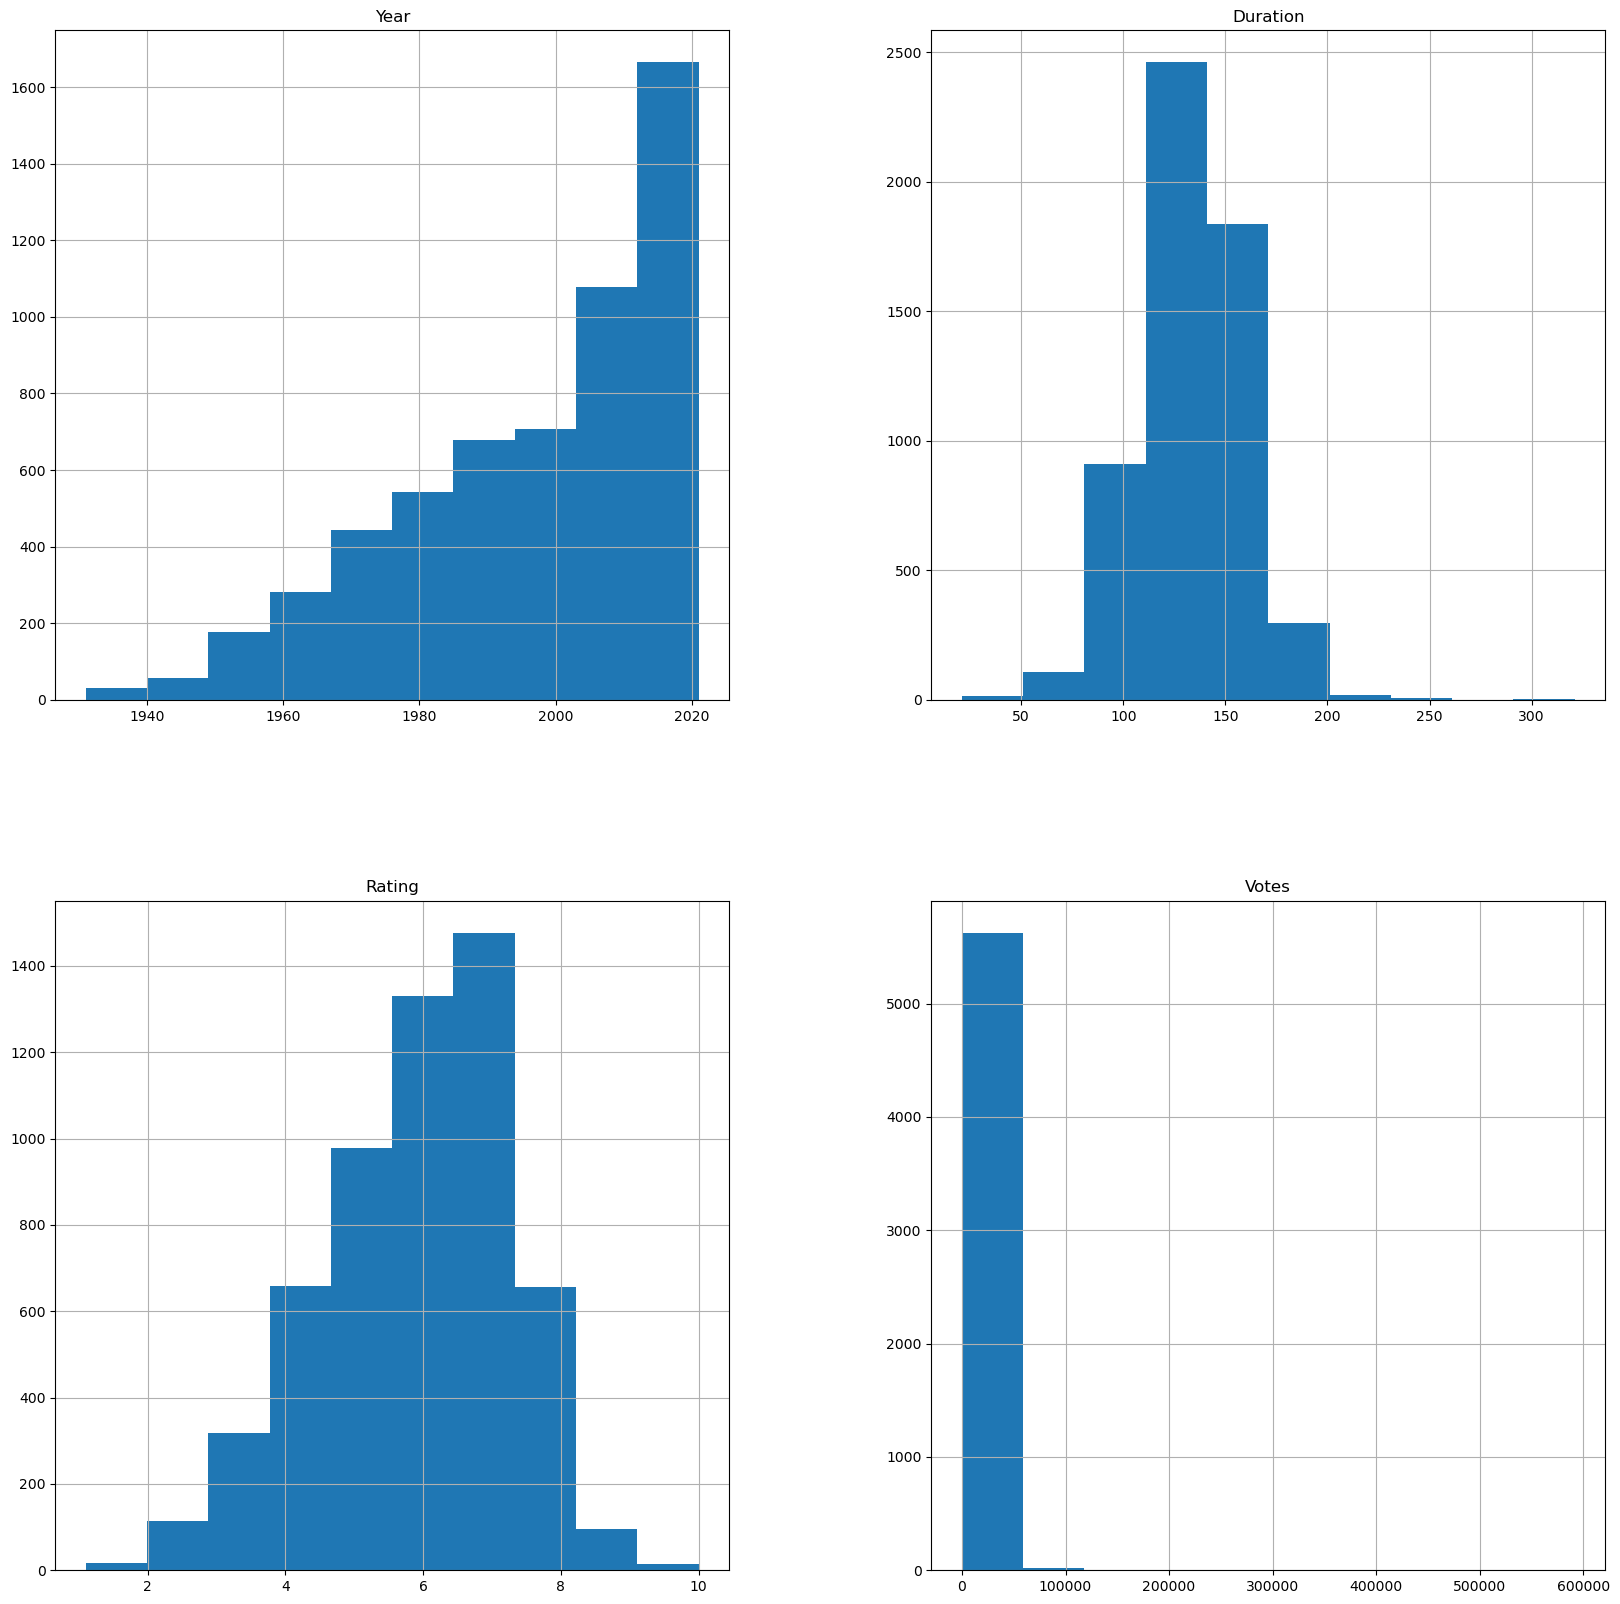

In [25]:
df.hist(figsize=(20,20))

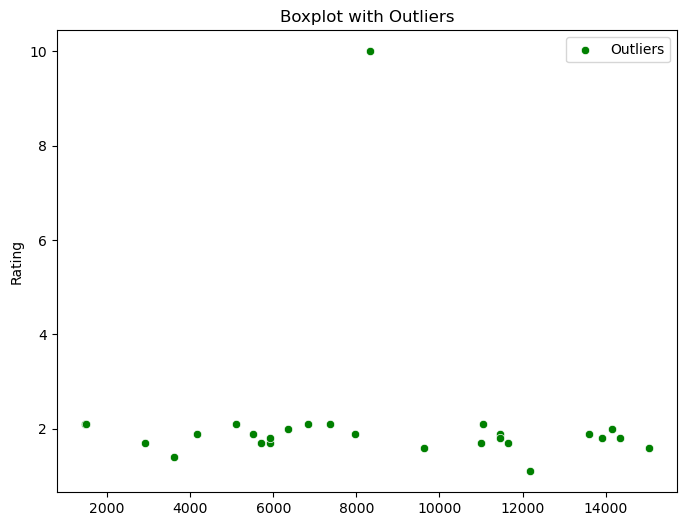

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1473,B.A. Pass 2,2017,125,Drama,2.1,419,Shadab Khan,Shadab Khan,Kritika Sachdeva,Satiiysh Saarathy Sasho
1488,Baaghi 3,2020,143,"Action, Comedy, Musical",2.1,10309,Ahmed Khan,Tiger Shroff,Riteish Deshmukh,Shraddha Kapoor
2918,Chatur Singh Two Star,2011,150,"Action, Adventure, Comedy",1.7,624,Ajay Chandhok,Sanjay Dutt,Ameesha Patel,Anupam Kher
3618,Desh Drohi,2008,140,"Action, Thriller",1.4,3899,Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt
4170,Dracula 2012,2013,137,Horror,1.9,128,Vinayan,Thilakan,Shraddha Das,Monal Gajjar
5114,Glamour Girl,2000,123,Crime,2.1,23,Rakesh Bedi,Kishore Anand Bhanushali,Dolly Bindra,Poonam Dasgupta
5523,Hari Puttar: A Comedy of Terrors,2008,90,"Comedy, Drama, Family",1.9,314,Rajesh Bajaj,Lucky Kohli,Jackie Shroff,Sarika
5711,Himmatwala,2013,150,"Action, Comedy, Drama",1.7,8186,Sajid Khan,Ajay Devgn,Tamannaah Bhatia,Mahesh Manjrekar
5915,Humein Tumse Pyar Ho Gaya Chupke Chupke,2003,135,Drama,1.7,27,Pramod Mandloi,Meghna Desai,Siddharth Dhawan,Dinesh Hingoo
5933,Humshakals,2014,159,"Comedy, Drama, Romance",1.8,7840,Sajid Khan,Saif Ali Khan,Riteish Deshmukh,Ram Kapoor


In [26]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

outliers = df[(df['Rating'] < lb) | (df['Rating'] > ub)]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=outliers.index, y=outliers['Rating'], color='green', label='Outliers')
plt.title('Boxplot with Outliers')
plt.show()

outliers

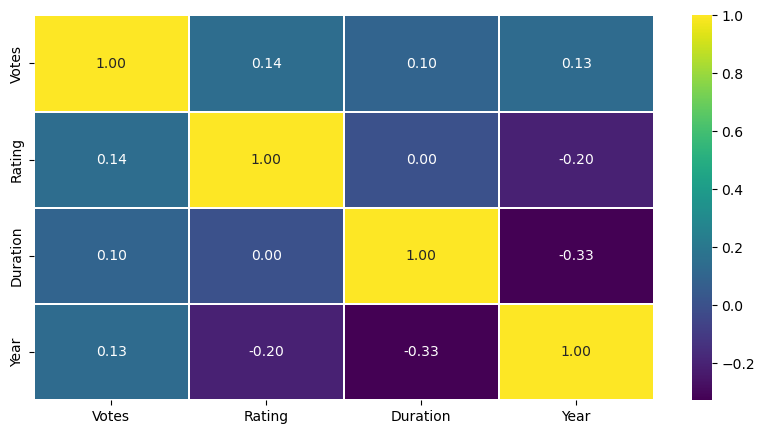

In [27]:
columns = ['Votes', 'Rating', 'Duration', 'Year']

correlation = df[columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,xticklabels=columns,yticklabels=columns,fmt='.2f',linewidths=0.05,cmap='viridis')
plt.show()

In [28]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [29]:
#### REMOVE UNRELATED COLUMNS

df.drop(['Name','Genre','Director','Actor 1','Actor 2','Actor 3'],axis=1,inplace=True)
df.head(5)

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [30]:
df.columns

Index(['Year', 'Duration', 'Rating', 'Votes'], dtype='object')

In [32]:
x = df.drop('Rating',axis=1)
y = df['Rating']

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random', RandomForestRegressor(random_state=42))
])

rf_pipeline.fit(x_train, y_train)
y_pred_rf = rf_pipeline.predict(x_test)

In [36]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
mae_rf = mean_absolute_error(y_test,y_pred_rf)
print(f'Random Forest Mean Absolute Error: {mse_rf}')
r2_rf = r2_score(y_test,y_pred_rf)
print(f'Random Forest R2-score: {mse_rf}')

Random Forest Mean Squared Error: 1.4911385523203768
Random Forest Mean Absolute Error: 1.4911385523203768
Random Forest R2-score: 1.4911385523203768


In [38]:

rf_pipeline.fit(x_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('random', RandomForestRegressor(random_state=42))])

In [43]:
y_pred = rf_pipeline.predict(x_test)

In [ ]:
user_input = {}
for feature in x_train.columns:
    user_input[feature] = float(input(f"Enter the value for {feature}: "))

# Create a DataFrame from the user input
user_df = pd.DataFrame([user_input])

predict = rf_pipeline.predict(user_df)

# Convert array to a normal value representation
predict = predict[0]

predict